<a href="https://colab.research.google.com/github/HwangHanJae/datascience-basic-tect/blob/main/seaborn_boxplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###seaborn 라이브러리 정리
- [seaborn API 링크](https://seaborn.pydata.org/api.html)
- seborn은 파이썬 데이터 시각화 라이브러리
- matplotlib에 기반하였음

In [3]:
#라이브러리 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import set_matplotlib_formats

In [4]:
#그래프가 잘보이게 하기 위해 'ggplot' 스타일을 사용
plt.style.use('ggplot')
#폰트가 선명하게 보이게 하기위하여
set_matplotlib_formats('svg')

###[boxplot](https://ko.wikipedia.org/wiki/%EC%83%81%EC%9E%90_%EC%88%98%EC%97%BC_%EA%B7%B8%EB%A6%BC) - 위키백과

- 범주와 관련된 분포를 표시하는 상자 그림
- 변수간, 범주형 변수 수준 간의 비교를 용이하게 함
- 양적 데이터의 분포를 보여줌
- 데이터 세트의 사분위수 범위를 박스형식으로 표현
- 이상치로 확인되는 것을 점으로 표현


###boxplot 실습에 사용할 데이터
- tips
 - total_bill(float64) : 최종 금액
 - tip(float64) : 팁
 - sex(category) : 성별
 - smoker(category) : 흡연자/비흡연자
 - day(category) : 요일(Sun/Sat/Thur/Fri)
 - time(category) : 시간(Dinner/Lunch)
 - size(int64) : 인원(1~6)


####tips

In [5]:
#데이터 로드하기
tips = sns.load_dataset('tips')

In [6]:
#데이터 정보
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [7]:
#데이터 수치적 요약
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [8]:
#데이터 범주적 요약
tips.describe(include='category')

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


####그래프 확인

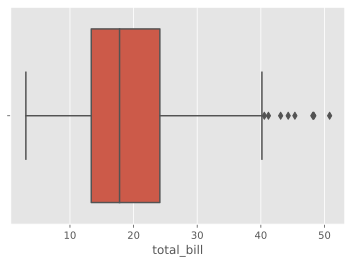

In [9]:
#x축에 특정 컬럼을 지정
sns.boxplot(x=tips['total_bill'])

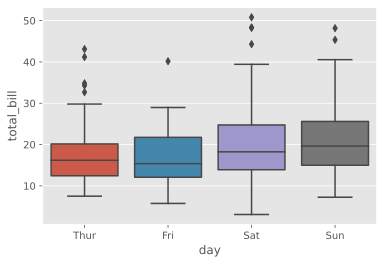

In [10]:
#total_bill 컬럼을 day 별로 표현
sns.boxplot(data=tips, x='day', y='total_bill')

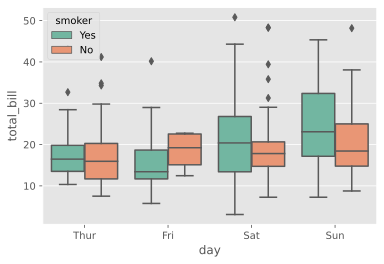

In [14]:
#hue 옵션 사용
#smoker 컬럼을 다른 색상으로 표현
sns.boxplot(data=tips, x='day', y='total_bill', hue='smoker',
            palette='Set2')

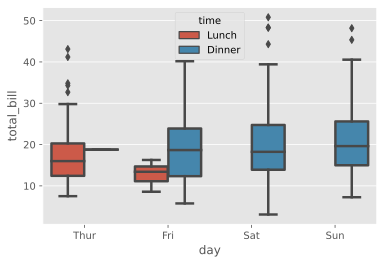

In [24]:
sns.boxplot(x='day', y='total_bill', hue='time',data=tips, linewidth=2.5)

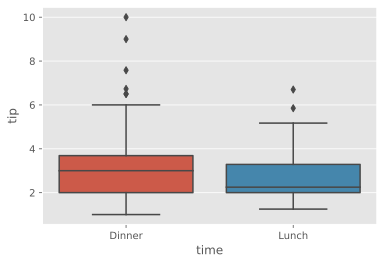

In [25]:
#order옵션 사용
#order 옵션에 할당된 순서로 그래프에 표현
sns.boxplot(x='time', y='tip', data=tips, order=['Dinner', "Lunch"])

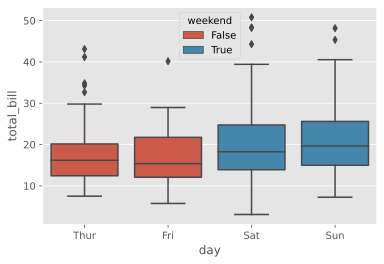

In [33]:
tips['weekend'] = tips['day'].isin(['Sat','Sun'])
sns.boxplot(x='day', y='total_bill', hue='weekend', data=tips, dodge=False)

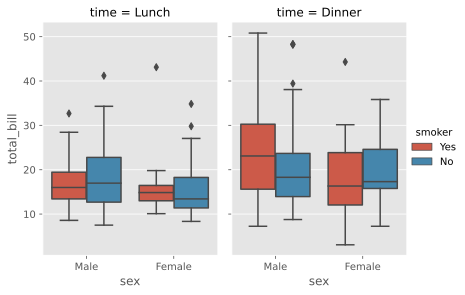

In [34]:
#catplot에서 boxplot 사용하기
#boxplot에는 col 옵션이 없기 떄문에 2개 이상의 서브플롯을 그리지 못함
sns.catplot(kind='box', x='sex', y='total_bill', data=tips,
            hue='smoker', col='time', height=4, aspect=.7)